In [1]:
## todo
# README.md
# optimizer : learning rate scheduler
# layer : rnn, batch normalization
# analysis : validation error
# fit : callbacks

# tf -> custom calcuration program

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import k.Activations.functions as Activations
import k.Layers.functions as Layers
import k.Losses.functions as Losses
import k.Optimizers.functions as Optimizers

In [3]:
class Neural_network:
    def __init__(self):
        self.network = []

    def to_object(self, param, class_):
        if type(param) == str:
            return class_(param)
        return param

    def compile(self, loss, optimizer):
        self.loss = self.to_object(loss, Losses.function)
        self.optimizer = self.to_object(optimizer, Optimizers.function)

        for layer in self.network:
            if not hasattr(layer, 'set_shape'):
                continue

            if layer.input_shape is None:
                layer.input_shape = output_shape

            layer.set_shape()
            output_shape = layer.output_shape

            if hasattr(layer, 'set_vars'):
                layer.set_vars(self.optimizer)

        self.network_depth = len(self.network)

    def predict(self, data):
        self.calcuration_graph = [data]

        for layer in self.network:
            data = layer.forward(data)
            self.calcuration_graph.append(data)

        return data

    def evaluate(self, x, y):
        loss = self.loss.forward(y, self.predict(x))
        return loss

    def fit(self, x, y, batch_size, epochs, verbose):
        loss_graph = []

        data_num = x.shape[0]

        if batch_size > data_num:
            batch_size = data_num

        mini_batch_num = data_num//batch_size
        epoch_digits = len(str(epochs))

        for epoch in range(epochs):
            for batch in range(mini_batch_num):
                index = np.random.randint(data_num, size=batch_size)
                batch_x = x[index, :]
                batch_y = y[index, :]

                batch_p = self.predict(batch_x)

                loss = self.loss.forward(batch_y, batch_p)
                gradients = self.loss.backward(batch_y, batch_p)
                for i in range(self.network_depth):
                    gradients = self.network[-i-1].backward(gradients, self.calcuration_graph[-i-2], self.calcuration_graph[-i-1])

                if verbose == 2:
                    print(f"epoch: {epoch:0{epoch_digits}d}, batch: {batch}/{mini_batch_num} | loss: ", f'{loss:.4f}' if loss <= 0.0001 else f'{loss:.4e}')

            if verbose == 1:
                print(f"epoch: {epoch:0{epoch_digits}d} | loss: ", f'{loss:.4f}' if loss > 0.0001 else f'{loss:.4e}')

            loss_graph.append(loss)

        return np.array(loss_graph)

In [4]:
x = np.array([[[i+j+k for k in range(10)] for j in range(10)] for i in range(1000)], dtype=np.float32) / 1000
y = np.array([[(x[i][-1][-1])] for i in range(1000)])

random_idx = np.random.randint(1000, size=200)
test_x, test_y = x[random_idx], y[random_idx]
train_x = np.delete(x, random_idx, axis=0)
train_y = np.delete(y, random_idx, axis=0)

In [5]:
model = Neural_network()
model.network.append(Layers.Recurrent_network(input_shape=train_x.shape[1::], output_shape=32))
model.network.append(Activations.Tanh())
model.network.append(Layers.Dense(output_shape=32))
model.network.append(Activations.ReLU())
model.network.append(Layers.Dense(output_shape=1))
model.network.append(Activations.Linear())

optimizer = Optimizers.Adam(learning_rate=1e-4)
model.compile('mse', optimizer)

2024-03-14 11:34:04.879457: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-14 11:34:04.880719: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
model.evaluate(test_x, test_y)

<tf.Tensor: shape=(), dtype=float32, numpy=0.95509094>

In [7]:
hist = model.fit(train_x, train_y, batch_size=64, epochs=100, verbose=1)

epoch: 000 | loss:  0.9443
epoch: 001 | loss:  0.7813
epoch: 002 | loss:  0.7827
epoch: 003 | loss:  0.6410
epoch: 004 | loss:  0.7668
epoch: 005 | loss:  0.5842
epoch: 006 | loss:  0.5978
epoch: 007 | loss:  0.5691
epoch: 008 | loss:  0.5568
epoch: 009 | loss:  0.4145
epoch: 010 | loss:  0.3397
epoch: 011 | loss:  0.2982
epoch: 012 | loss:  0.2498
epoch: 013 | loss:  0.2922
epoch: 014 | loss:  0.2390
epoch: 015 | loss:  0.2060
epoch: 016 | loss:  0.1160
epoch: 017 | loss:  0.1350
epoch: 018 | loss:  0.1105
epoch: 019 | loss:  0.1392
epoch: 020 | loss:  0.1445
epoch: 021 | loss:  0.1113
epoch: 022 | loss:  0.1076
epoch: 023 | loss:  0.0843
epoch: 024 | loss:  0.0804
epoch: 025 | loss:  0.0758
epoch: 026 | loss:  0.0714
epoch: 027 | loss:  0.0627
epoch: 028 | loss:  0.0477
epoch: 029 | loss:  0.0609
epoch: 030 | loss:  0.0567
epoch: 031 | loss:  0.0413
epoch: 032 | loss:  0.0625
epoch: 033 | loss:  0.0588
epoch: 034 | loss:  0.0420
epoch: 035 | loss:  0.0488
epoch: 036 | loss:  0.0493
e

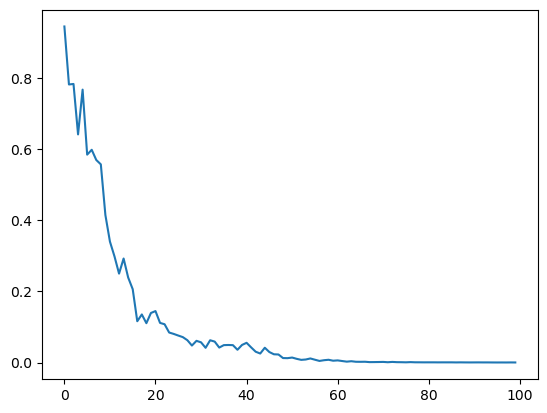

In [8]:
plt.plot(hist)
plt.show()

In [9]:
model.evaluate(test_x, test_y)

<tf.Tensor: shape=(), dtype=float32, numpy=0.00020437043>

make tensorflow model to compare

In [10]:
tf_model = tf.keras.Sequential()
tf_model.add(tf.keras.layers.SimpleRNN(32, input_shape=train_x.shape[1::], activation='tanh'))
tf_model.add(tf.keras.layers.Dense(32, activation='relu'))
tf_model.add(tf.keras.layers.Dense(1, activation='linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
tf_model.compile(loss='mse', optimizer=optimizer)

In [11]:
tf_model.evaluate(test_x, test_y)

7/7 [==============================] - 0s 3ms/step - loss: 2.4090


2.409003973007202

In [12]:
tf_hist = tf_model.fit(train_x, train_y, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 2.1257
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 1.5031
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 1.0063
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6326
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3545
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1721
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.0865
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0515
Epoch 9/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0349
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0254
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0190
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 0.0138
Epoch 13/100
13/13 [=================

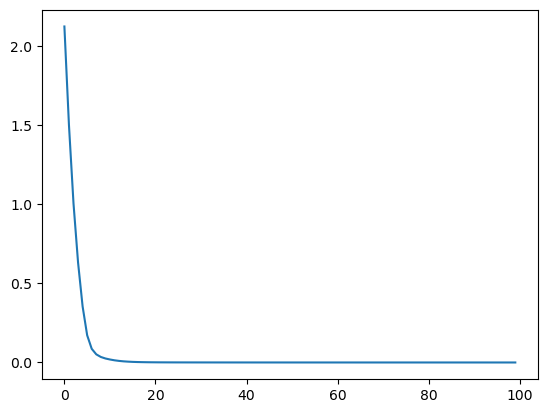

In [13]:
plt.plot(tf_hist.history['loss'])
plt.show()

In [14]:
tf_model.evaluate(test_x, test_y)

7/7 [==============================] - 0s 2ms/step - loss: 4.2305e-05


4.2304509406676516e-05